In [26]:
import pandas as pd

In [27]:
fname = "phospho_adjusted_PTM_model.csv"

In [28]:
df = pd.read_csv(fname)

In [29]:
df

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,GlobalProtein,Adjusted
0,rev_sp|Q8IZF0|NALCN_HUMAN_S671_S673,Normal vs Tumor,0.368244,0.423420,0.869690,36.098211,0.390216,0.601102,rev_sp|Q8IZF0|NALCN_HUMAN,True
1,rev_sp|Q8IZF0|NALCN_HUMAN_S673,Normal vs Tumor,0.274938,0.293539,0.936632,20.922661,0.359634,0.573444,rev_sp|Q8IZF0|NALCN_HUMAN,True
2,rev_sp|Q8IZF0|NALCN_HUMAN_T1391_T1392,Normal vs Tumor,0.388885,0.396438,0.980947,54.902136,0.330922,0.546448,rev_sp|Q8IZF0|NALCN_HUMAN,True
3,sp|A0A096LP49|CC187_HUMAN_S478,Normal vs Tumor,1.051959,0.384433,2.736388,62.035633,0.008092,0.044172,sp|A0A096LP49|CC187_HUMAN,True
4,sp|A0A096LP49|CC187_HUMAN_S519,Normal vs Tumor,0.823267,0.472628,1.741894,53.314349,0.087294,0.231980,sp|A0A096LP49|CC187_HUMAN,True
...,...,...,...,...,...,...,...,...,...,...
57678,sp|Q9Y620|RA54B_HUMAN_S14,Normal vs Tumor,-0.528896,0.152192,-3.475187,14.000000,0.003714,0.019691,missing,False
57679,sp|Q9Y662|HS3SB_HUMAN_S115,Normal vs Tumor,-0.109805,0.240919,-0.455774,6.000000,0.664583,0.797927,missing,False
57680,sp|Q9Y675|SNURF_HUMAN_S34,Normal vs Tumor,-0.092610,0.156962,-0.590017,6.000000,0.576709,0.732654,missing,False
57681,sp|Q9Y6X0|SETBP_HUMAN_S1567,Normal vs Tumor,0.427582,0.133969,3.191639,56.000000,0.002320,0.013506,missing,False


In [30]:
df = df[df['adj.pvalue'] < 0.001]
df = df[df['Adjusted'] == True]

In [31]:
df.sort_values(by="log2FC")

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,GlobalProtein,Adjusted
11649,sp|P30038|AL4A1_HUMAN_S543,Normal vs Tumor,-3.799433,0.323400,-11.748414,18.070834,6.768324e-10,6.225615e-08,sp|P30038|AL4A1_HUMAN,True
54943,sp|Q9Y6R1|S4A4_HUMAN_Y64_S65_S68,Normal vs Tumor,-3.622582,0.238311,-15.201096,73.009634,2.557133e-24,5.418859e-21,sp|Q9Y6R1|S4A4_HUMAN,True
7459,sp|P05062|ALDOB_HUMAN_S36_T39,Normal vs Tumor,-3.606155,0.336612,-10.713079,18.990545,1.725189e-09,1.408189e-07,sp|P05062|ALDOB_HUMAN,True
54933,sp|Q9Y6R1|S4A4_HUMAN_S61_S65_S68,Normal vs Tumor,-3.446410,0.235884,-14.610591,82.330341,1.402865e-24,3.220568e-21,sp|Q9Y6R1|S4A4_HUMAN,True
10555,sp|P22830|HEMH_HUMAN_S130,Normal vs Tumor,-3.249181,0.281445,-11.544622,45.367768,4.258225e-15,1.396521e-12,sp|P22830|HEMH_HUMAN,True
...,...,...,...,...,...,...,...,...,...,...
15757,sp|P56748|CLD8_HUMAN_T204,Normal vs Tumor,3.288392,0.567503,5.794494,45.739047,5.984670e-07,2.221950e-05,sp|P56748|CLD8_HUMAN,True
44780,sp|Q9H1X3|DJC25_HUMAN_S7,Normal vs Tumor,3.331163,0.342415,9.728426,6.748822,3.249793e-05,6.102722e-04,sp|Q9H1X3|DJC25_HUMAN,True
1153,sp|O14513|NCKP5_HUMAN_S1250,Normal vs Tumor,3.496113,0.666716,5.243778,65.736954,1.794852e-06,5.612428e-05,sp|O14513|NCKP5_HUMAN,True
15760,sp|P56748|CLD8_HUMAN_Y219_S220,Normal vs Tumor,3.664525,0.560796,6.534501,96.667574,2.994422e-09,2.294626e-07,sp|P56748|CLD8_HUMAN,True


Make a list of all the proteins and the phosphorylated sites (residues/positions) in the filtered data set

In [32]:
protein_site_pairs = []
for _, row in df.iterrows():
    parts = row['Protein'].split('|')
    up_id = parts[1]
    mnemonic_site_parts = parts[2].split('_')
    '_'.join(mnemonic_site_parts[:1])
    sites = mnemonic_site_parts[2:]
    for site in sites:
        residue = site[0]
        position = site[1:]
        protein_site_pairs.append((up_id, residue, position))

It turns out, a lot of the sites in the data are not consistent with the UniProt reference sequence and have to be mapped using the Protmapper.

We create a new list of sites where we fix some of the sites via the Protmapper.

In [33]:
from protmapper.api import default_mapper

In [34]:
mapped_site_pairs = []
for up_id, residue, position in protein_site_pairs:
    mapped_site = default_mapper.map_to_human_ref(up_id, 'uniprot', residue, position)
    if not mapped_site.valid and mapped_site.mapped_id:
        print(mapped_site)
        mapped_site_pairs.append((mapped_site.mapped_id, mapped_site.mapped_res, mapped_site.mapped_pos))
    else:
        mapped_site_pairs.append((up_id, residue, position))

MappedSite(up_id='P01106', error_code=None, valid=False, orig_res='S', orig_pos='347', mapped_id='P01106', mapped_res='S', mapped_pos='362', description='REMAPPED_FROM_PSP_SEQUENCE', gene_name='MYC')
MappedSite(up_id='P49411', error_code=None, valid=False, orig_res='Y', orig_pos='246', mapped_id='P49411', mapped_res='Y', mapped_pos='249', description='REMAPPED_FROM_PSP_SEQUENCE', gene_name='TUFM')
MappedSite(up_id='Q8NFD5', error_code=None, valid=False, orig_res='S', orig_pos='1072', mapped_id='Q8NFD5', mapped_res='S', mapped_pos='1155', description='REMAPPED_FROM_PSP_SEQUENCE', gene_name='ARID1B')
MappedSite(up_id='Q8NFD5', error_code=None, valid=False, orig_res='S', orig_pos='1710', mapped_id='Q8NFD5', mapped_res='S', mapped_pos='1793', description='REMAPPED_FROM_PSP_SEQUENCE', gene_name='ARID1B')
MappedSite(up_id='Q8WYJ6', error_code=None, valid=False, orig_res='T', orig_pos='251', mapped_id='Q8WYJ6', mapped_res='T', mapped_pos='256', description='REMAPPED_FROM_PSP_SEQUENCE', gene_n

We load a full table of all the substrate sites with upstream controllers (mostly but not always kinases) collected by INDRA.

In [35]:
df_indra = pd.read_csv('https://raw.githubusercontent.com/gyorilab/protmapper_paper/master/output/export.csv')

Make a dictionary mapping substrate sites to the list of controllers it is phosphorylated by.

In [36]:
from collections import defaultdict
annotations_in_indra = defaultdict(list)
for _, row in df_indra.iterrows():
    site = (row['TARGET_UP_ID'], row['TARGET_RES'], str(row['TARGET_POS']))
    controller = (row['CTRL_NS'], row['CTRL_ID'])
    annotations_in_indra[site].append(controller)

In [37]:
print('Number of sites in filtered data: %d' % len(mapped_site_pairs))
print('Number of sites in filtered data that have upstream controller annotations: %d' % len(set(annotations_in_indra) & set(mapped_site_pairs)))

Number of sites in filtered data: 3893
Number of sites in filtered data that have upstream controller annotations: 283


Let's make a list of the most commonly encountered controllers (this could be done in a more sophisticated way using enrichment) to get a simple picture of kinases likely to be dysregulated.

In [38]:
controllers = []
for site, ctrls in annotations_in_indra.items():
    if site in mapped_site_pairs:
        controllers += ctrls

In [39]:
from collections import Counter
Counter(controllers).most_common(10)

[(('UP', 'P68400'), 28),
 (('UP', 'P28482'), 27),
 (('UP', 'P01133'), 25),
 (('UP', 'P24941'), 23),
 (('UP', 'P06493'), 23),
 (('UP', 'P17612'), 22),
 (('UP', 'P49841'), 20),
 (('FPLX', 'ERK'), 20),
 (('FPLX', 'PKA'), 15),
 (('UP', 'P27361'), 15)]

In [40]:
from indra.databases import uniprot_client
for (ctrl_ns, ctrl_id), _ in Counter(controllers).most_common(10):
    if ctrl_ns == 'UP':
        print(uniprot_client.get_gene_name(ctrl_id))
    else:
        print(ctrl_id)

CSNK2A1
MAPK1
EGF
CDK2
CDK1
PRKACA
GSK3B
ERK
PKA
MAPK3


Interestingly, CSNK2A1 shows up as the top kinase. It is also called CK2alpha, and is one of the subunits of CK2.

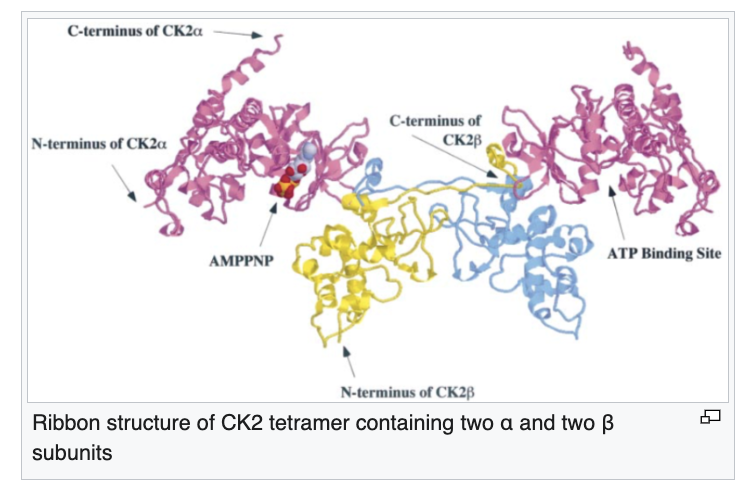

There is 

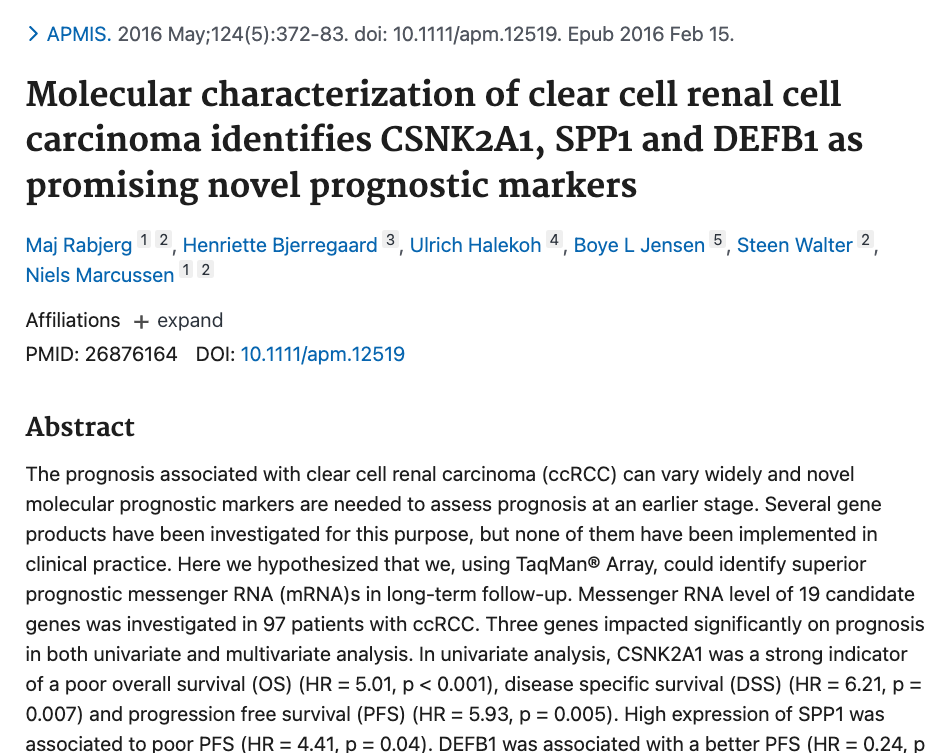

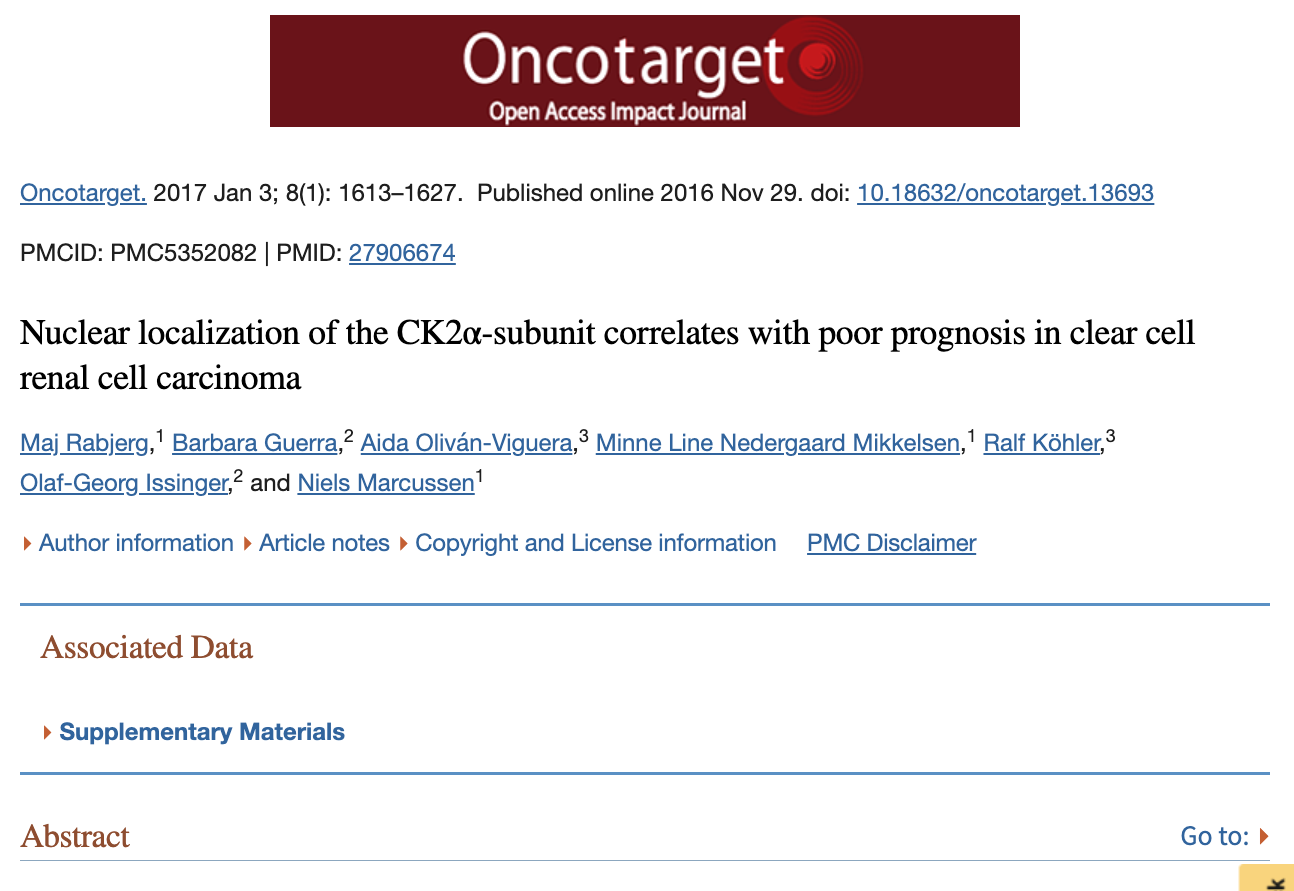

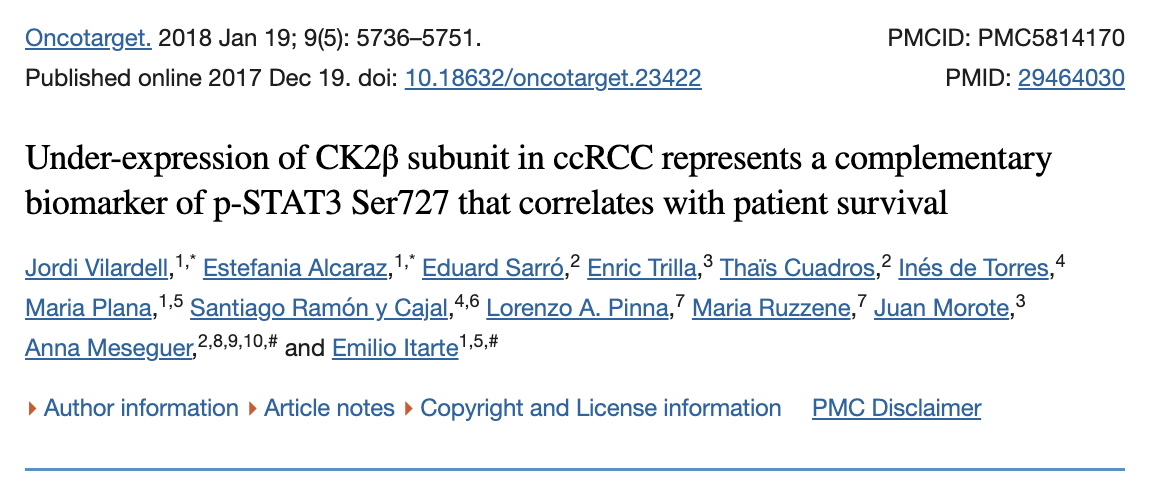

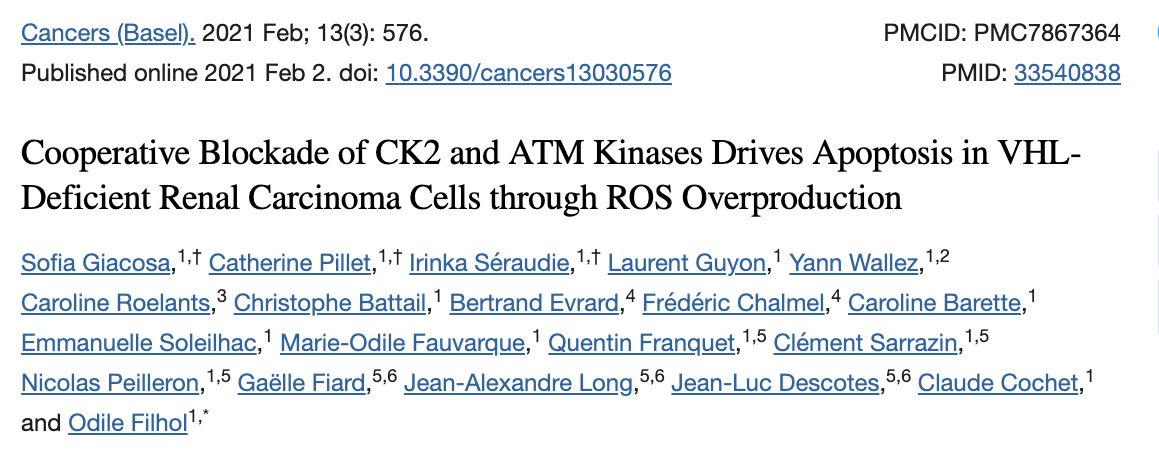